In [ ]:
'''
По уроку 2:
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.


По уроку 3:
1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?
7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель 
при помощи градиентного и стохастического градиентного спуска. 

Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.
Модифицировать решение первого задания путем добавления  𝐿2 -регуляризации 
(в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

'''

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [2]:
from sklearn.datasets import make_regression

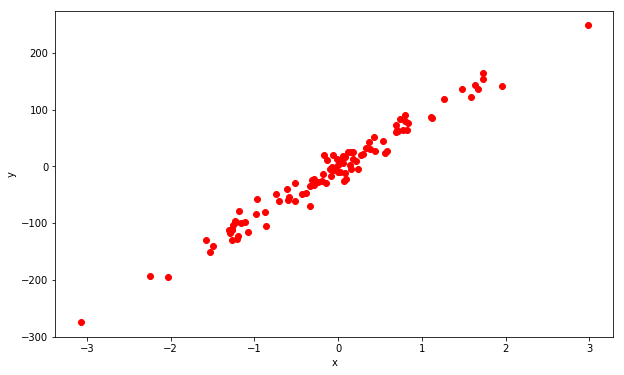

In [20]:
plt.figure(figsize=(10, 6))
plt.xlabel('x')
plt.ylabel('y')
X, y = make_regression(n_samples=100, n_features=1, noise=15)
plt.scatter(X,y, c='r')
plt.show()

In [21]:
len(X)

100

In [22]:
X.shape

(100, 1)

In [23]:
X.T.shape

(1, 100)

In [24]:
#добавим столбец 1 для расчета slope 
x_ones = np.array([[1 for x in range(len(X))]])
X = np.append (X.T, x_ones, axis = 0) 

In [25]:
x_ones

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [26]:
X.shape

(2, 100)

In [27]:
X = np.flip(X, axis=0)

In [28]:
from sklearn import linear_model

# создадим модель
linear_regressor = linear_model.LinearRegression()

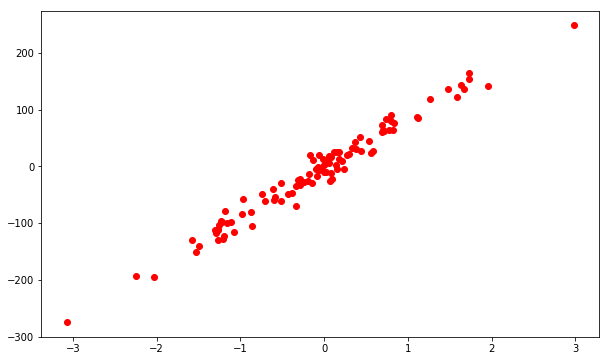

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(X[1],y, c='r')

In [31]:
# обучим ее
linear_regressor.fit(np.reshape(X[1], (-1, 1)), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
# выведем полученный вес при признаке и свободный коэффициент
print(f' свободный член intercept {linear_regressor.intercept_}, slope угол наклона  {linear_regressor.coef_[0]}')

 свободный член intercept -1.830345189630548, slope угол наклона  87.30257034478245


Посчитаем вручную к-ты, чтобы проверить 

Формула для прогноза

\begin{align}
\hat{y} = \hat{\beta_1} - \hat{\beta_2}*  \bar{x_i}
\end{align}

Slope - угол наклона кривой 

\begin{align}
\hat{\beta_2} = \frac{\sum (x_i - \bar{x}) (y_i - \bar{y}) }{\sum (x_i - \bar{x})^2}
\end{align}

Intercept - свободный член

\begin{align}
\hat{\beta_1} = \bar{y}- \hat{\beta_2}*  \bar{x}
\end{align}

In [33]:
x_exp = X[1] #признак
x_mean = np.mean(x_exp)
y_mean = np.mean(y)

In [34]:
#Вычислим slope уровень наклона 
b_nom = 0
b_denom = 0
for i in range(len(x_exp)):
    b_n = (x_exp[i] - x_mean)*(y[i] - y_mean)
    b_d = (x_exp[i] - x_mean)**2
    b_nom +=b_n
    b_denom +=b_d
b_2 = b_nom / b_denom

In [35]:
#Вычислим intercept - свободный член
b_1 = y_mean - b_2 * x_mean

In [36]:
#сравним показатели sklearn и ручного расчтеа 
print ('')
print (f'Свободный член (intercept) ручной расчет {round(b_1,4)} = {round(linear_regressor.intercept_, 4)} sklearn')
print ('')
print (f'Угол наклона (slope) ручной расчет {round(b_2,4)} = {round(linear_regressor.coef_[0], 4)} sklearn')


Свободный член (intercept) ручной расчет -1.8303 = -1.8303 sklearn

Угол наклона (slope) ручной расчет 87.3026 = 87.3026 sklearn


Наша **линейная модель**

\begin{align}
y =   -0.0131   + 23.897  * x_i
\end{align}

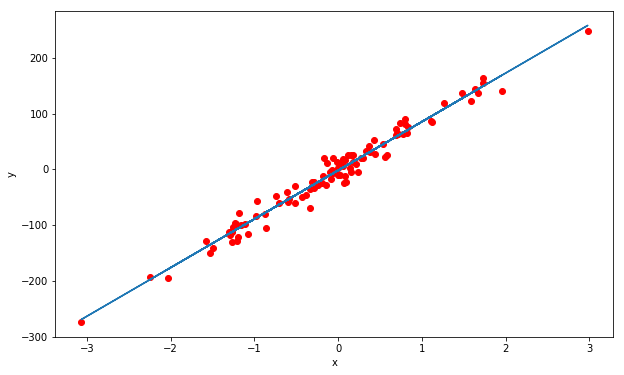

In [37]:
plt.figure(figsize=(10, 6))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X[1], y, c='r')
plt.plot(x_exp, b_1 + b_2*x_exp)
plt.show()

План 

1) посчитать вручную к-ты 
2) нарисовать 
3) посчитать вручную градиент и стох градиенты
4) сделать lambda зависимость 
5) залить на гит 

**Простой градиентный спуск GRADIENT DESCENT** </br>

Оценим модель при помощи среднеквадратической ошибки модели. Этот критерий будем использовать, как функцию потерь при поиске оптимальных к-тов (весов) в градиентном спуске

Для вычисления **среднеквадратической ошибки** (MSE) все отдельные остатки регрессии возводятся в квадрат, суммируются, сумма делится на общее число ошибок:

\begin{align}
MSE = \frac{\sum^{n}_{i=1} (y_i - \bar{y})^2 }{n}
\end{align}

**Формула градиентого спуска** 

Определяем новые к-ты (slope, intercept) в данном случае линейной регрессии при помощи разницы между текущими весами $w^{t}$ и производной (показывает угол наклона на графике) от функции потерь $\nabla (MSE)$, умноженной скорость обучения $h$. Минус, потому что мы ищем минимум функции, а не максимум. 

\begin{align}
w^{t+1} = 	w^{t} -  h  * {\sum^{n}_{i=1} \nabla (MSE)}
\end{align}

**Производная MSE**

\begin{align}
\nabla (MSE) = \frac{\sum^{n}_{i=1} 2 (y_i - \bar{y})}{n}
\end{align}

In [38]:
#Функция среднеквадратической ошибки
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [39]:
n = X.shape[1] #количество объектов 
W = np.array([1, 0.5]) #intercept умножаем на 1, а slope на  к-ты 
alpha = 1e-1
iterations = 100 #темп обучения 
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \
       \nInitial weights = {iterations}')
err_l = []
#исправить ошибку 
for i in range(iterations):
    y_pred = np.dot(W, X) #прогноз по каждой точке 
    err = calc_mse(y, y_pred)
    #print (y_pred)
    err_l.append(err)
    W -= alpha * (1/n * 2 * X.dot (y_pred - y))
    
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
    #print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 100        
Learning rate = 0.1        
Initial weights = [1.  0.5]        
Initial weights = 100
Iteration #0: W_new = [-1.11294388 16.9233644 ], MSE = 7361.73
Iteration #10: W_new = [-3.55735005 78.43544723], MSE = 315.61
Iteration #20: W_new = [-2.24760979 86.13876403], MSE = 205.91
Iteration #30: W_new = [-1.90605192 87.14493083], MSE = 203.92
Iteration #40: W_new = [-1.84270794 87.28072548], MSE = 203.88
Iteration #50: W_new = [-1.832264   87.29949517], MSE = 203.88
Iteration #60: W_new = [-1.83063492 87.30213286], MSE = 203.88
Iteration #70: W_new = [-1.83038825 87.30250768], MSE = 203.88
Iteration #80: W_new = [-1.83035153 87.30256133], MSE = 203.88
Iteration #90: W_new = [-1.83034612 87.30256904], MSE = 203.88


In [40]:
iter_list =[x for x in range(iterations)]

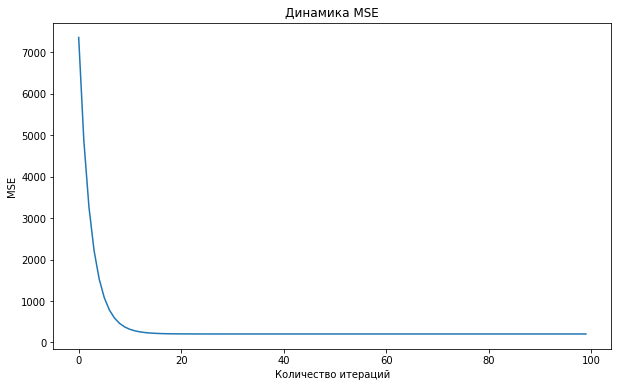

In [41]:
plt.figure(figsize=(10, 6))
plt.xlabel('Количество итераций')
plt.ylabel('MSE')
plt.plot(iter_list, err_l)
plt.title ('Динамика MSE')
plt.show()

## Стохастический градиентный спуск 

Отмасштабируем получившиеся признаки методом стандартизации.

In [43]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [44]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

#масштабирование признаков 
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [45]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [46]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 248.3494


In [47]:
max_iter

100000.0

In [48]:
min_weight_dist

1e-08

In [49]:
1e-8

1e-08

In [50]:
weight_dist

5.891889688481542e-09

Для стохастического градиентного спуска мы увеличили максимальное число итераций (max_iter) до 10000, что естественно, так как из-за специфики метода для достижения сходимости нужно большее количество шагов.



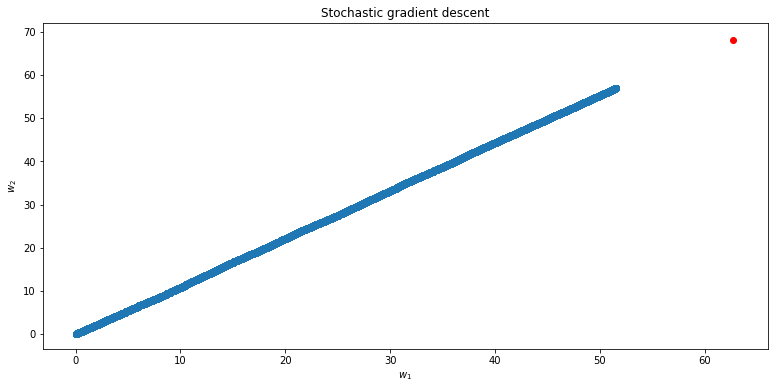

In [51]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

движение весов к-тов идет справа вверху вниз, сокращая их значения по мере вычисления градиентного спуска стохастическим образом

Text(0, 0.5, 'MSE')

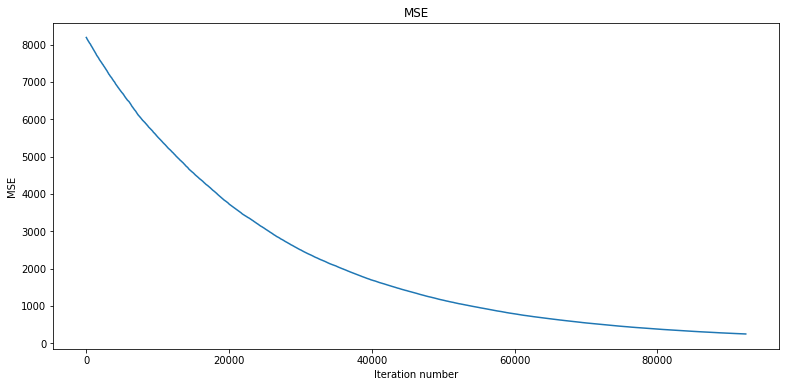

In [52]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Как и в случае градиентного спуска, вектор весов приближается к истинному. При этом падает и ошибка.  
Добиться лучшей скорости сходимости в методе стохастического градиентного спуска можно варьируя величину шага или используя методы, подбирающие ее адаптивно.